# Linear Regressions 
### Peng Chen, May 28th 2020

### The purpose of this Linear regression model is trying to figure out the average medical charges based on patients' age

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
insurance_df = pd.read_csv('./insurance.csv')

In [3]:
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
mean_charge_by_age = insurance_df[["age","charges"]].groupby("age").mean().round(0)["charges"].values

In [7]:
age = np.asarray(list(range(18,65)))

In [8]:
new_df = pd.DataFrame({'age': age, 'charges':mean_charge_by_age})

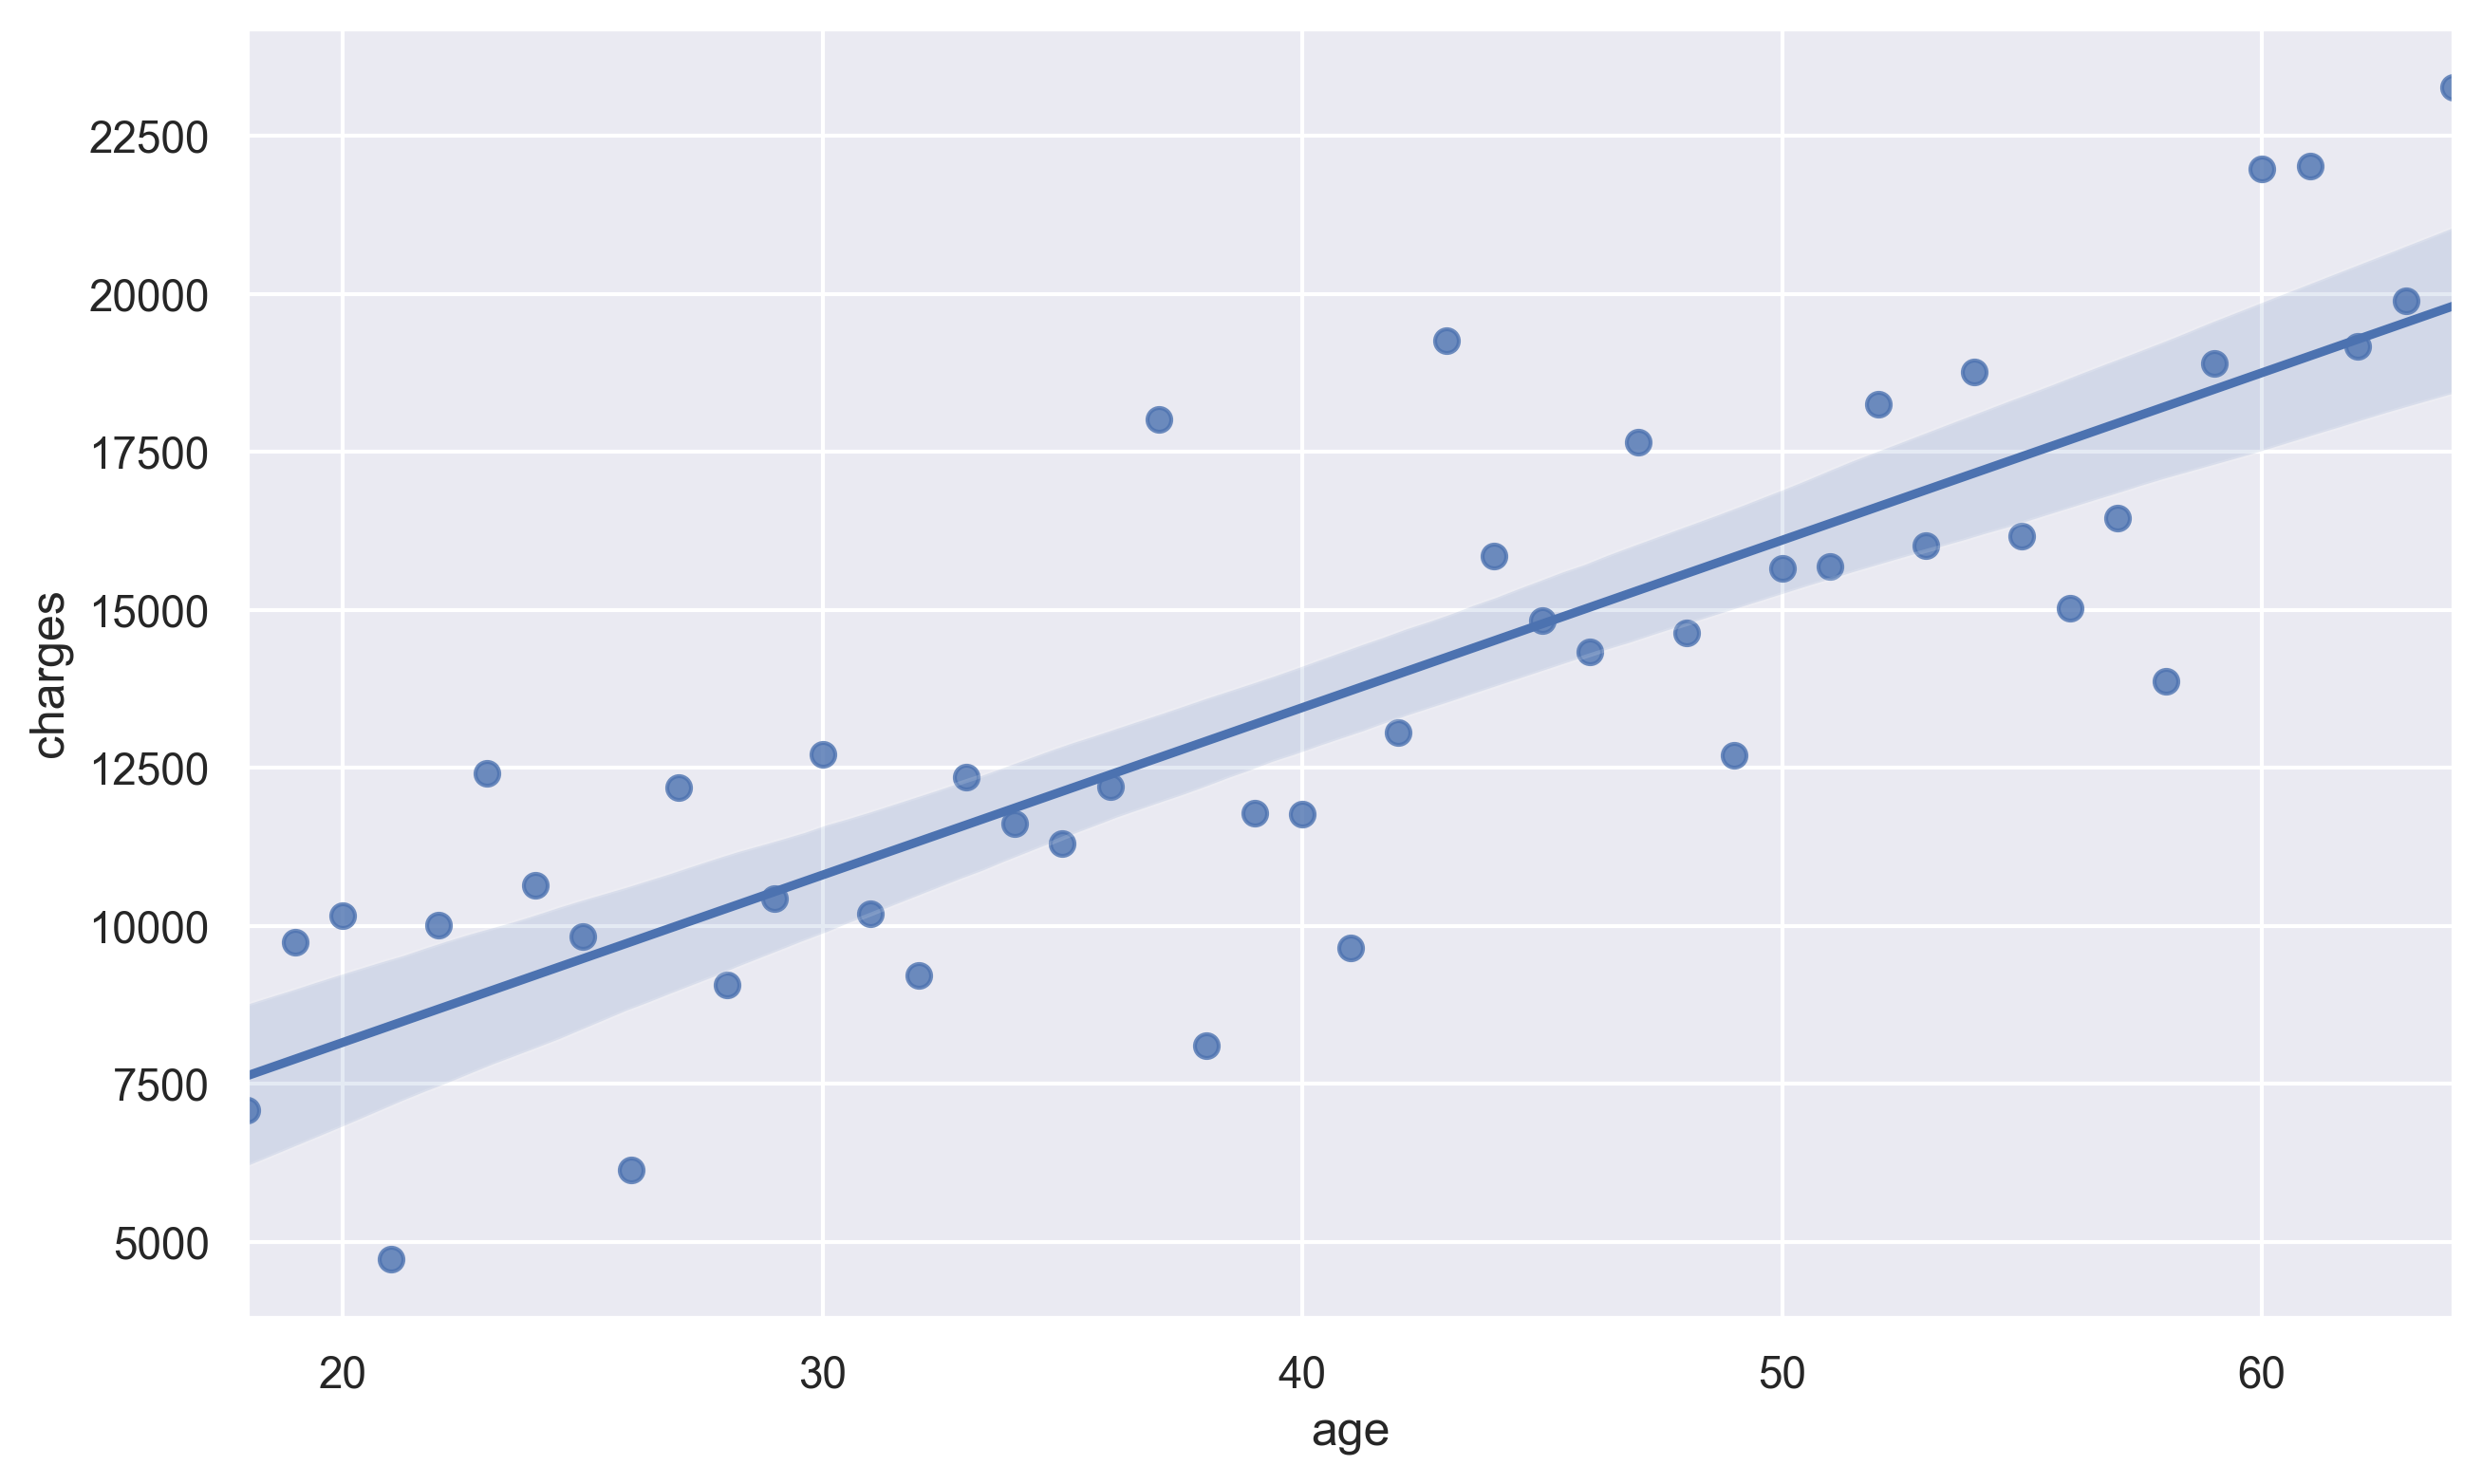

In [22]:
sns.set()
plt.figure(figsize=(10,6),dpi=300)
sns.regplot( x="age", y='charges', data=new_df, order=1)

In [16]:
x=age.reshape(-1,1)
y=mean_charge_by_age
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

In [20]:
lm = LinearRegression()
lm.fit(x_train,y_train)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 73.03 %
Test accuracy 60.4 %


## Conclusions
1. Based on the Linear regression model, we can see that the patients' average medical charges are related to the age.
2. In general, the higher the patients' age, the higher the medical charges.
3. The train accuracy is 73% which means that in 73% of cases, higher age patients would pay more in average compair to younger patients. 